In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-07 05:53:33.873462


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-1435.6178)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.4343)tensor(6.3953)tensor(4.4995)tensor(4.0856)tensor(3.3758)tensor(2.8705)tensor(10.)tensor(3.2535)tensor(3.3295)tensor(3.4213)tensor(4.7663)tensor(3.0736)tensor(3.4739)tensor(7.2278)tensor(3.6484)tensor(3.9607)tensor(6.1418)tensor(2.9297)tensor(3.2794)tensor(5.6521)tensor(8.8936)tensor(4.2940)tensor(6.0449)tensor(5.0461)tensor(7.6036)tensor(7.1512)tensor(5.5555)tensor(6.4647)tensor(6.6724)tensor(6.4418)tensor(6.8616)tensor(7.3304)tensor(5.7873)tensor(6.3132)tensor(4.3298)tensor(3.4260)tensor(6.3801)tensor(7.5226)tensor(4.4443)tensor(5.9521)tensor(3.0883)tensor(4.7512)tensor(7.6509)tensor(3.1290)tensor(5.0543)tensor(3.2959)tensor(8.3261)tensor(9.9370)tensor(7.6604)tensor(7.5222)tensor(2.8375)tensor(4.2179)tensor(5.9164)tensor(3.2673)tensor(6.1680)tensor(4.3457)tensor(4.6123)tensor(4.7126)tensor(6.2216)tensor(7.5264)tensor(3.1788)tensor(5.0914)tensor(5.6589)tensor(7.1882)tensor(5.7937)tensor(3.6303)tensor(3.4755)tensor(3.8456)tensor(3.1732)tensor(4.7271)tensor(3.1958)tensor(3.

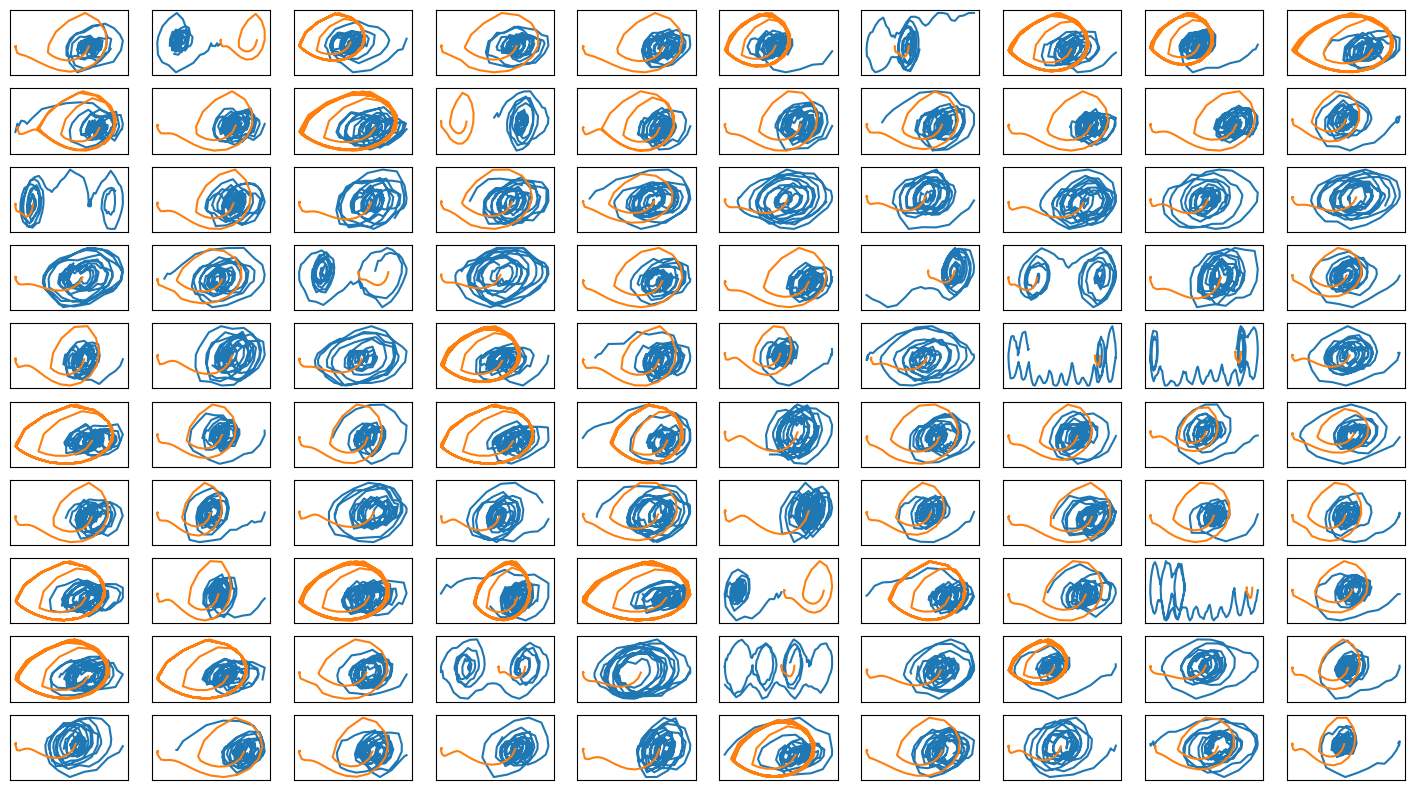

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 762.48764  validloss 531.20707±0.00000  bestvalidloss 531.20707  last_update 0
train: iter 1  trainloss 417.96320  validloss 392.55956±0.00000  bestvalidloss 392.55956  last_update 0
train: iter 2  trainloss 358.77944  validloss 312.53670±0.00000  bestvalidloss 312.53670  last_update 0
train: iter 3  trainloss 323.18389  validloss 280.04086±0.00000  bestvalidloss 280.04086  last_update 0
train: iter 4  trainloss 942.10120  validloss 720.64418±0.00000  bestvalidloss 280.04086  last_update 1
train: iter 5  trainloss 307.42858  validloss 280.69087±0.00000  bestvalidloss 280.04086  last_update 2
train: iter 6  trainloss 288.95958  validloss 358.56926±0.00000  bestvalidloss 280.04086  last_update 3
train: iter 7  trainloss 273.16012  validloss 267.47586±0.00000  bestvalidloss 267.47586  last_update 0
train: iter 8  trainloss 274.22317  validloss 248.87259±0.00000  bestvalidloss 248.87259  last_update 0
train: iter 9  trainloss 283.61164  validloss

train: iter 78  trainloss -460.54433  validloss -414.11181±0.00000  bestvalidloss -431.91295  last_update 2
train: iter 79  trainloss -466.28936  validloss -442.98114±0.00000  bestvalidloss -442.98114  last_update 0
train: iter 80  trainloss -471.87942  validloss -420.93194±0.00000  bestvalidloss -442.98114  last_update 1
train: iter 81  trainloss -468.59426  validloss -430.39097±0.00000  bestvalidloss -442.98114  last_update 2
train: iter 82  trainloss -480.50020  validloss -460.58221±0.00000  bestvalidloss -460.58221  last_update 0
train: iter 83  trainloss -472.78443  validloss -458.72873±0.00000  bestvalidloss -460.58221  last_update 1
train: iter 84  trainloss -483.53197  validloss -457.56915±0.00000  bestvalidloss -460.58221  last_update 2
train: iter 85  trainloss -489.80374  validloss -428.62344±0.00000  bestvalidloss -460.58221  last_update 3
train: iter 86  trainloss -482.73163  validloss -461.48838±0.00000  bestvalidloss -461.48838  last_update 0
train: iter 87  trainloss -4

train: iter 154  trainloss -664.64817  validloss -633.58601±0.00000  bestvalidloss -657.00193  last_update 1
train: iter 155  trainloss -664.32270  validloss -644.28210±0.00000  bestvalidloss -657.00193  last_update 2
train: iter 156  trainloss -654.60324  validloss -605.97412±0.00000  bestvalidloss -657.00193  last_update 3
train: iter 157  trainloss -644.82656  validloss -624.16097±0.00000  bestvalidloss -657.00193  last_update 4
train: iter 158  trainloss -660.58211  validloss -586.84410±0.00000  bestvalidloss -657.00193  last_update 5
train: iter 159  trainloss -647.72958  validloss -666.97498±0.00000  bestvalidloss -666.97498  last_update 0
train: iter 160  trainloss -671.37701  validloss -620.93463±0.00000  bestvalidloss -666.97498  last_update 1
train: iter 161  trainloss -661.46710  validloss -632.40206±0.00000  bestvalidloss -666.97498  last_update 2
train: iter 162  trainloss -654.53174  validloss -643.41444±0.00000  bestvalidloss -666.97498  last_update 3
train: iter 163  tr

train: iter 229  trainloss -689.67216  validloss -691.59294±0.00000  bestvalidloss -700.47394  last_update 23
train: iter 230  trainloss -700.08737  validloss -666.47906±0.00000  bestvalidloss -700.47394  last_update 24
train: iter 231  trainloss -677.33311  validloss -620.03996±0.00000  bestvalidloss -700.47394  last_update 25
train: iter 232  trainloss -691.14500  validloss -654.38509±0.00000  bestvalidloss -700.47394  last_update 26
train: iter 233  trainloss -675.96407  validloss -693.14965±0.00000  bestvalidloss -700.47394  last_update 27
train: iter 234  trainloss -671.13130  validloss -674.94289±0.00000  bestvalidloss -700.47394  last_update 28
train: iter 235  trainloss -693.16686  validloss -652.45752±0.00000  bestvalidloss -700.47394  last_update 29
train: iter 236  trainloss -656.69312  validloss -574.85493±0.00000  bestvalidloss -700.47394  last_update 30
train: iter 237  trainloss -684.52654  validloss -660.12251±0.00000  bestvalidloss -700.47394  last_update 31
train: ite

train: iter 304  trainloss -708.05750  validloss -671.81873±0.00000  bestvalidloss -713.66030  last_update 7
train: iter 305  trainloss -727.89209  validloss -677.60153±0.00000  bestvalidloss -713.66030  last_update 8
train: iter 306  trainloss -724.47689  validloss -698.66672±0.00000  bestvalidloss -713.66030  last_update 9
train: iter 307  trainloss -675.34286  validloss -672.37189±0.00000  bestvalidloss -713.66030  last_update 10
train: iter 308  trainloss -713.13849  validloss -642.07437±0.00000  bestvalidloss -713.66030  last_update 11
train: iter 309  trainloss -705.39283  validloss -702.77787±0.00000  bestvalidloss -713.66030  last_update 12
train: iter 310  trainloss -699.68755  validloss -691.63148±0.00000  bestvalidloss -713.66030  last_update 13
train: iter 311  trainloss -693.05229  validloss -695.23119±0.00000  bestvalidloss -713.66030  last_update 14
train: iter 312  trainloss -708.79112  validloss -694.38927±0.00000  bestvalidloss -713.66030  last_update 15
train: iter 3

train: iter 379  trainloss -692.65574  validloss -725.48776±0.00000  bestvalidloss -761.09971  last_update 40
train: iter 380  trainloss -712.22990  validloss -705.39136±0.00000  bestvalidloss -761.09971  last_update 41
train: iter 381  trainloss -702.27400  validloss -692.65729±0.00000  bestvalidloss -761.09971  last_update 42
train: iter 382  trainloss -692.76697  validloss -700.06517±0.00000  bestvalidloss -761.09971  last_update 43
train: iter 383  trainloss -678.33450  validloss -706.86467±0.00000  bestvalidloss -761.09971  last_update 44
train: iter 384  trainloss -720.57786  validloss -705.19320±0.00000  bestvalidloss -761.09971  last_update 45
train: iter 385  trainloss -719.54165  validloss -728.84945±0.00000  bestvalidloss -761.09971  last_update 46
train: iter 386  trainloss -712.32216  validloss -738.91138±0.00000  bestvalidloss -761.09971  last_update 47
train: iter 387  trainloss -709.42225  validloss -735.31143±0.00000  bestvalidloss -761.09971  last_update 48
train: ite

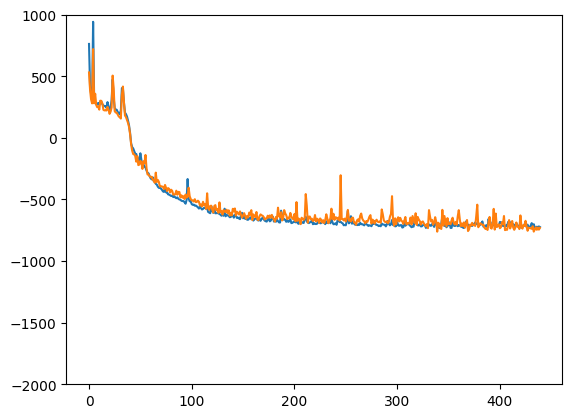

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  predict diverge [  9.26207584 -32.34607038] [ -1.32238903 -13.5912968 ] [99.185135 20.      ] [49.592567 10.      ] sim_timestep 33
38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  predict diverge [ 7.48317368 29.78303764] [ 1.34233555 12.30459427] [99.185135 20.      ] [49.592567 10.      ] sim_timestep 137
48  predict diverge [ 6.14994685 29.26413038] [ 1.18668    13.08510027] [99.185135 20.      ] [49.592567 10.      ] sim_timestep 177
49  50  51  52  53  54  55  56  

実環境方策rollout vs Sim環境方策rollout


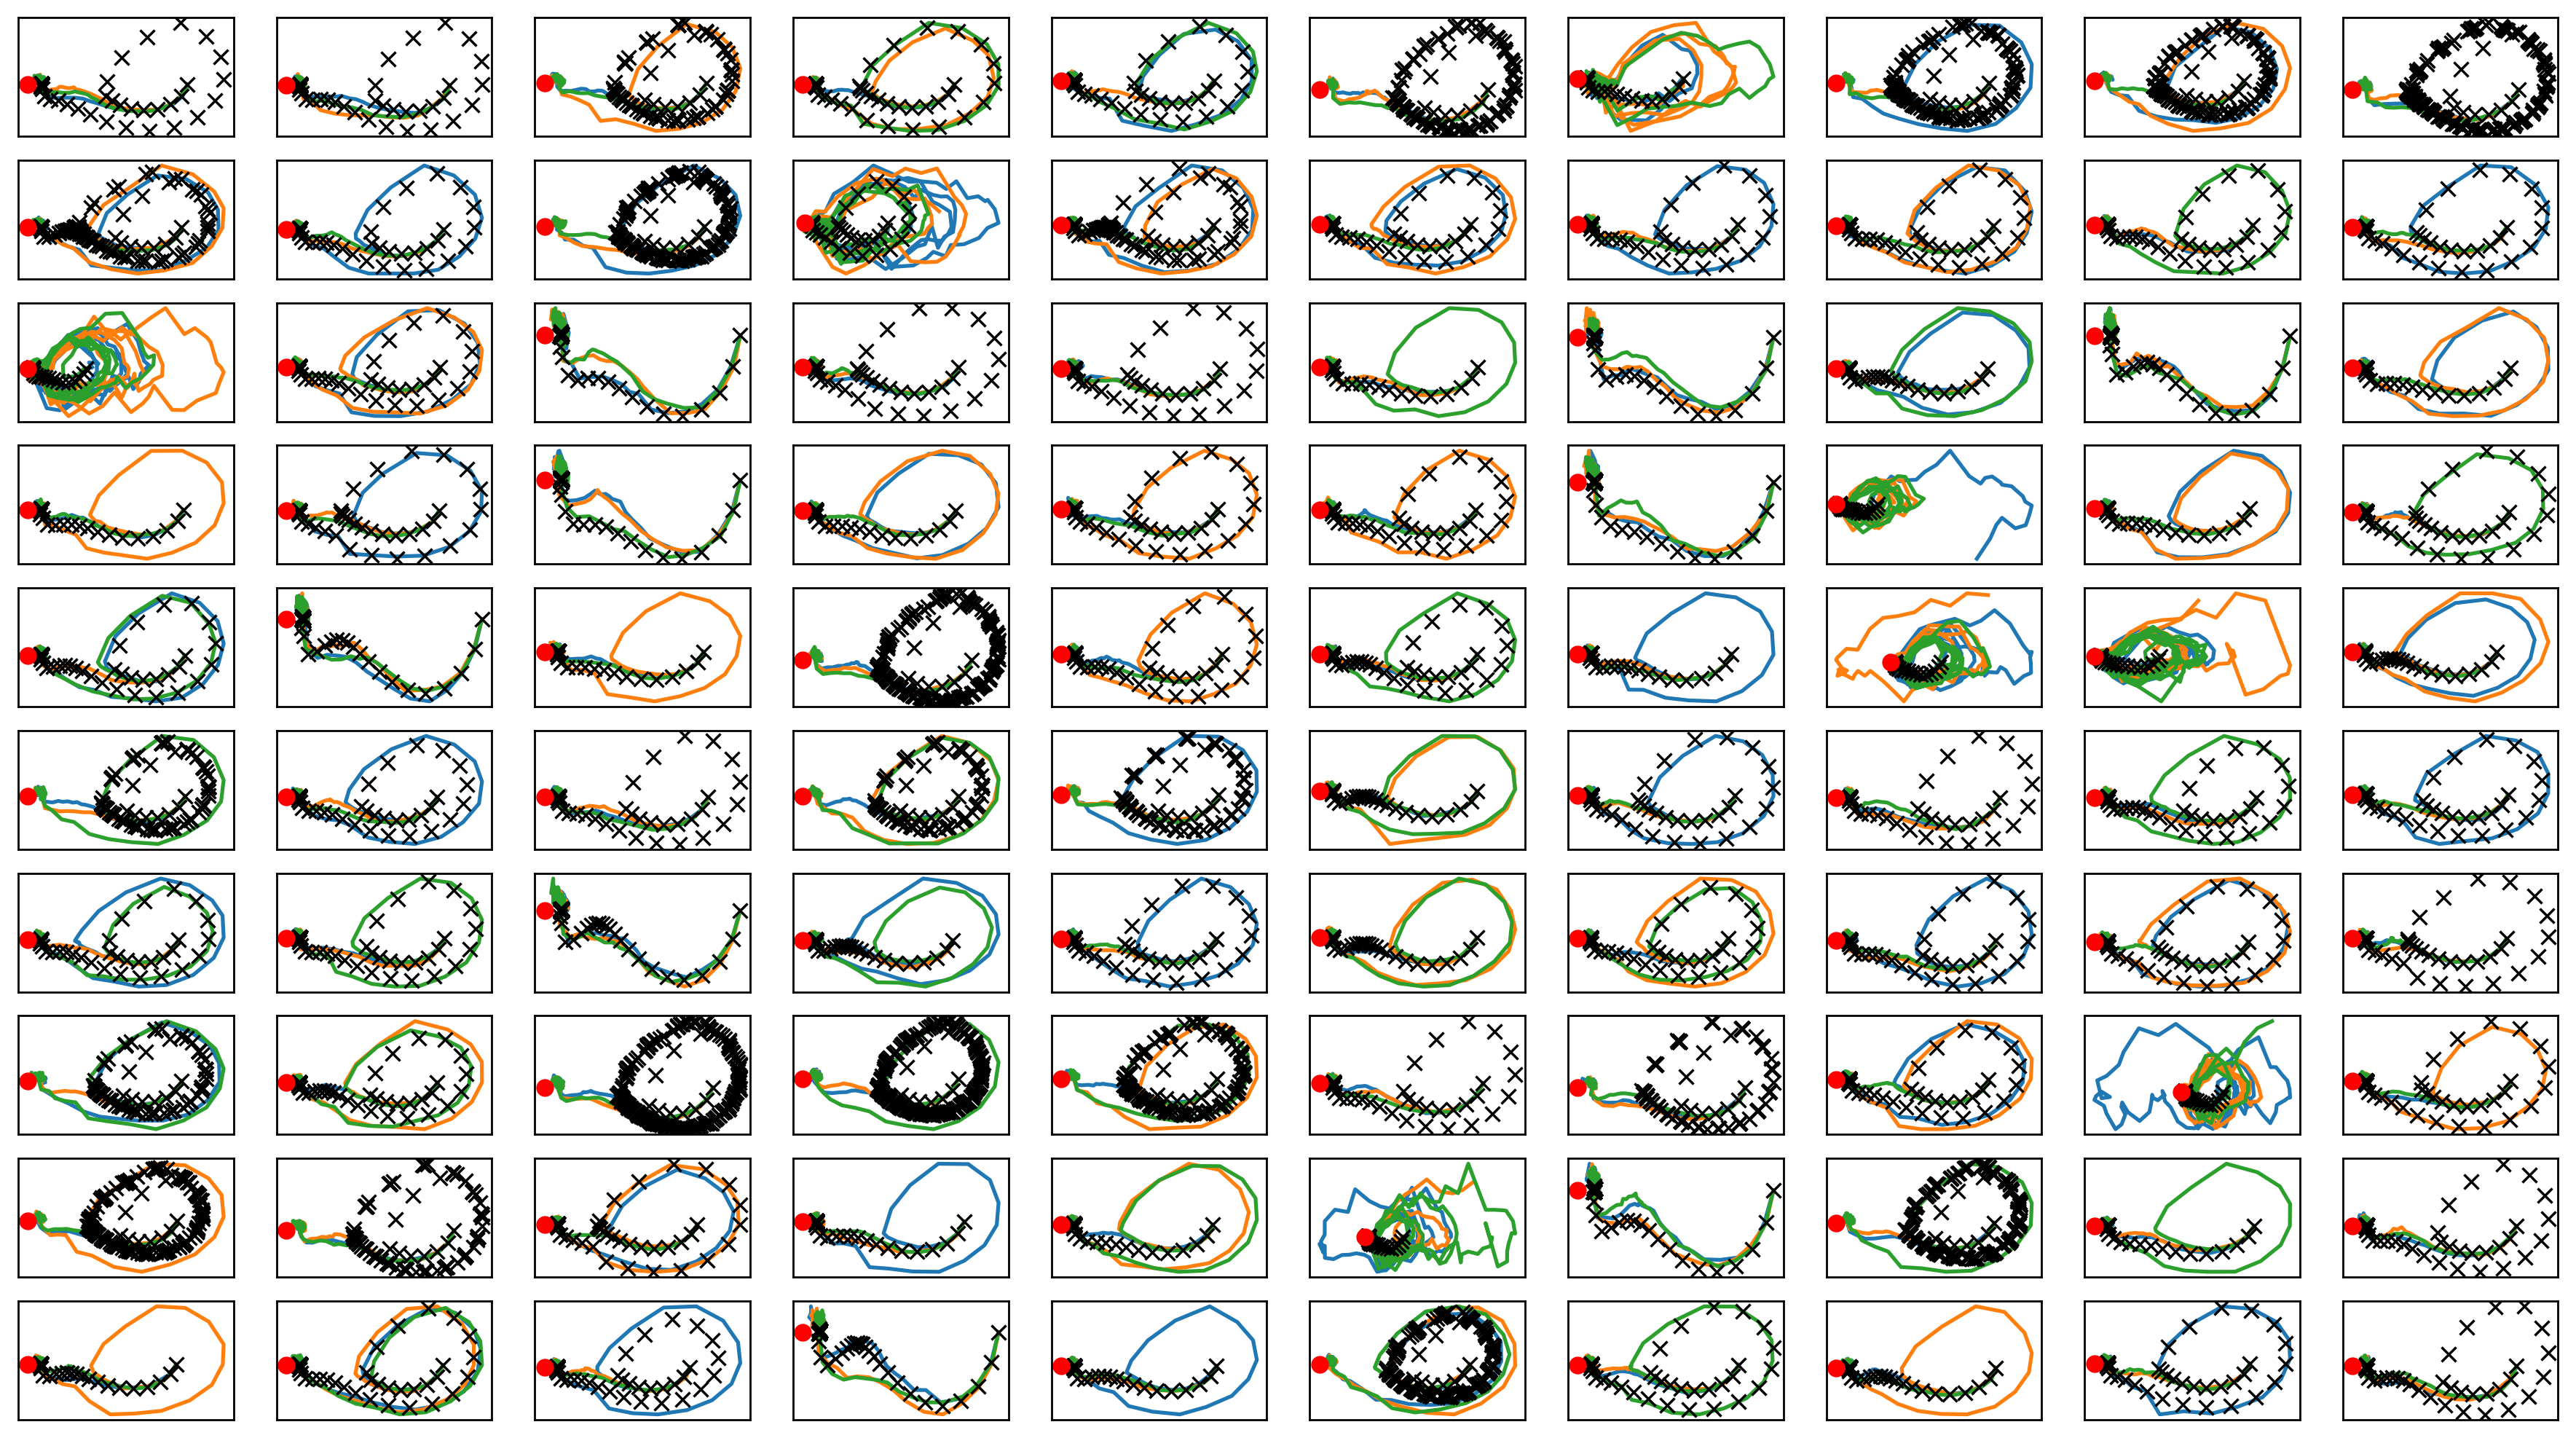

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

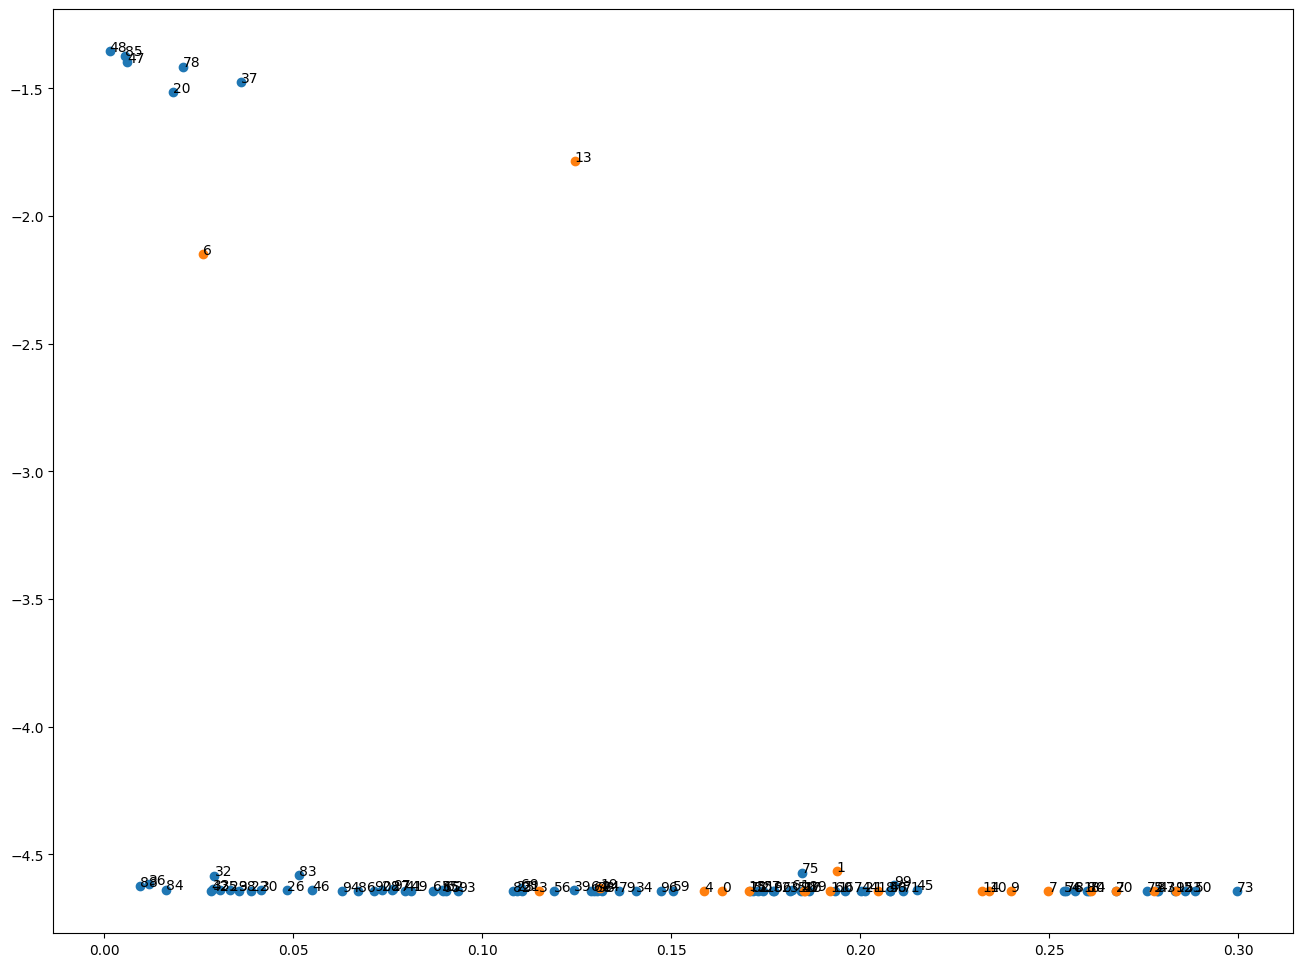

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


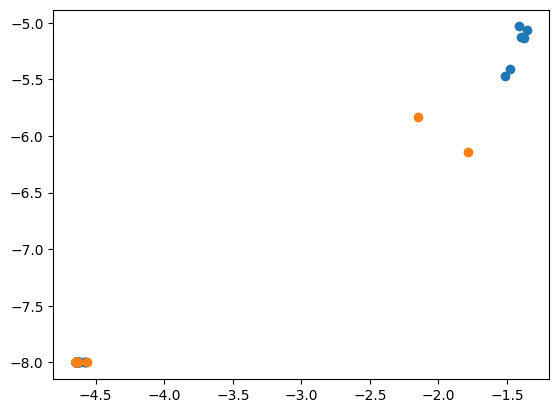

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 10.45228  validloss 10.79866±0.00000  bestvalidloss 10.79866  last_update 0
train: iter 1  trainloss 9.50755  validloss 9.79204±0.00000  bestvalidloss 9.79204  last_update 0
train: iter 2  trainloss 8.72017  validloss 8.95154±0.00000  bestvalidloss 8.95154  last_update 0
train: iter 3  trainloss 8.03214  validloss 8.22891±0.00000  bestvalidloss 8.22891  last_update 0
train: iter 4  trainloss 7.42952  validloss 7.60964±0.00000  bestvalidloss 7.60964  last_update 0
train: iter 5  trainloss 6.90601  validloss 7.04346±0.00000  bestvalidloss 7.04346  last_update 0
train: iter 6  trainloss 6.46076  validloss 6.57819±0.00000  bestvalidloss 6.57819  last_update 0
train: iter 7  trainloss 6.05053  validloss 6.16911±0.00000  bestvalidloss 6.16911  last_update 0
train: iter 8  trainloss 5.69649  validloss 5.78473±0.00000  bestvalidloss 5.78473  last_update 0
train: iter 9  trainloss 5.37988  validloss 5.44869±0.00000  bestvalidloss 5.44869  last_update 0
train: iter 10  t

train: iter 85  trainloss 1.44312  validloss 1.42434±0.00000  bestvalidloss 1.42434  last_update 0
train: iter 86  trainloss 1.42790  validloss 1.41119±0.00000  bestvalidloss 1.41119  last_update 0
train: iter 87  trainloss 1.40860  validloss 1.38933±0.00000  bestvalidloss 1.38933  last_update 0
train: iter 88  trainloss 1.39551  validloss 1.37800±0.00000  bestvalidloss 1.37800  last_update 0
train: iter 89  trainloss 1.37643  validloss 1.36296±0.00000  bestvalidloss 1.36296  last_update 0
train: iter 90  trainloss 1.36251  validloss 1.33975±0.00000  bestvalidloss 1.33975  last_update 0
train: iter 91  trainloss 1.35810  validloss 1.32513±0.00000  bestvalidloss 1.32513  last_update 0
train: iter 92  trainloss 1.35294  validloss 1.32352±0.00000  bestvalidloss 1.32352  last_update 0
train: iter 93  trainloss 1.33549  validloss 1.30471±0.00000  bestvalidloss 1.30471  last_update 0
train: iter 94  trainloss 1.32348  validloss 1.28719±0.00000  bestvalidloss 1.28719  last_update 0
train: ite

train: iter 170  trainloss 1.24275  validloss 1.21401±0.00000  bestvalidloss 1.19610  last_update 20
train: iter 171  trainloss 1.25837  validloss 1.20335±0.00000  bestvalidloss 1.19610  last_update 21
train: iter 172  trainloss 1.25648  validloss 1.23087±0.00000  bestvalidloss 1.19610  last_update 22
train: iter 173  trainloss 1.25662  validloss 1.21864±0.00000  bestvalidloss 1.19610  last_update 23
train: iter 174  trainloss 1.26710  validloss 1.16642±0.00000  bestvalidloss 1.16642  last_update 0
train: iter 175  trainloss 1.26012  validloss 1.19258±0.00000  bestvalidloss 1.16642  last_update 1
train: iter 176  trainloss 1.25782  validloss 1.21452±0.00000  bestvalidloss 1.16642  last_update 2
train: iter 177  trainloss 1.26441  validloss 1.20859±0.00000  bestvalidloss 1.16642  last_update 3
train: iter 178  trainloss 1.24728  validloss 1.19425±0.00000  bestvalidloss 1.16642  last_update 4
train: iter 179  trainloss 1.26376  validloss 1.19075±0.00000  bestvalidloss 1.16642  last_updat

train: iter 257  trainloss 1.26148  validloss 1.19780±0.00000  bestvalidloss 1.16642  last_update 83
train: iter 258  trainloss 1.24558  validloss 1.17019±0.00000  bestvalidloss 1.16642  last_update 84
train: iter 259  trainloss 1.24308  validloss 1.22529±0.00000  bestvalidloss 1.16642  last_update 85
train: iter 260  trainloss 1.25862  validloss 1.22552±0.00000  bestvalidloss 1.16642  last_update 86
train: iter 261  trainloss 1.26723  validloss 1.18767±0.00000  bestvalidloss 1.16642  last_update 87
train: iter 262  trainloss 1.23960  validloss 1.21664±0.00000  bestvalidloss 1.16642  last_update 88
train: iter 263  trainloss 1.26339  validloss 1.21397±0.00000  bestvalidloss 1.16642  last_update 89
train: iter 264  trainloss 1.24534  validloss 1.20771±0.00000  bestvalidloss 1.16642  last_update 90
train: iter 265  trainloss 1.25353  validloss 1.20890±0.00000  bestvalidloss 1.16642  last_update 91
train: iter 266  trainloss 1.25297  validloss 1.20422±0.00000  bestvalidloss 1.16642  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-4.3978, -0.3267], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 13.32598  validloss 19.00588±0.00000  bestvalidloss 19.00588  last_update 0
train: iter 1  trainloss 6.93686  validloss 10.64557±0.00000  bestvalidloss 10.64557  last_update 0
train: iter 2  trainloss 4.20648  validloss 6.11467±0.00000  bestvalidloss 6.11467  last_update 0
train: iter 3  trainloss 3.33143  validloss 4.58071±0.00000  bestvalidloss 4.58071  last_update 0
train: iter 4  trainloss 2.96893  validloss 3.91570±0.00000  bestvalidloss 3.91570  last_update 0
train: iter 5  trainloss 2.75702  validloss 3.63883±0.00000  bestvalidloss 3.63883  last_update 0
train: iter 6  trainloss 2.59944  validloss 3.49828±0.00000  bestvalidloss 3.49828  last_update 0
train: iter 7  trainloss 2.46810  validloss 3.20216±0.00000  bestvalidloss 3.20216  last_update 0
train: iter 8  trainloss 2.35026  validloss 2.80397±0.00000  bestvalidloss 2.80397  last_update 0
train: iter 9  trainloss 2.17584  validloss 2.58535±0.00000  bestvalidloss 2.58535  last_update 0
train: iter 10 

train: iter 83  trainloss 1.33546  validloss 1.06183±0.00000  bestvalidloss 0.97219  last_update 8
train: iter 84  trainloss 1.34909  validloss 1.05076±0.00000  bestvalidloss 0.97219  last_update 9
train: iter 85  trainloss 1.34372  validloss 1.08061±0.00000  bestvalidloss 0.97219  last_update 10
train: iter 86  trainloss 1.36743  validloss 1.08719±0.00000  bestvalidloss 0.97219  last_update 11
train: iter 87  trainloss 1.33223  validloss 1.06014±0.00000  bestvalidloss 0.97219  last_update 12
train: iter 88  trainloss 1.37710  validloss 1.01873±0.00000  bestvalidloss 0.97219  last_update 13
train: iter 89  trainloss 1.34276  validloss 0.99396±0.00000  bestvalidloss 0.97219  last_update 14
train: iter 90  trainloss 1.34206  validloss 1.11276±0.00000  bestvalidloss 0.97219  last_update 15
train: iter 91  trainloss 1.34820  validloss 1.14747±0.00000  bestvalidloss 0.97219  last_update 16
train: iter 92  trainloss 1.34873  validloss 1.06292±0.00000  bestvalidloss 0.97219  last_update 17
tr

train: iter 165  trainloss 1.33906  validloss 0.99834±0.00000  bestvalidloss 0.96750  last_update 52
train: iter 166  trainloss 1.35954  validloss 1.05855±0.00000  bestvalidloss 0.96750  last_update 53
train: iter 167  trainloss 1.36668  validloss 1.05821±0.00000  bestvalidloss 0.96750  last_update 54
train: iter 168  trainloss 1.35563  validloss 1.03097±0.00000  bestvalidloss 0.96750  last_update 55
train: iter 169  trainloss 1.36998  validloss 1.06896±0.00000  bestvalidloss 0.96750  last_update 56
train: iter 170  trainloss 1.34595  validloss 1.01122±0.00000  bestvalidloss 0.96750  last_update 57
train: iter 171  trainloss 1.34428  validloss 1.16295±0.00000  bestvalidloss 0.96750  last_update 58
train: iter 172  trainloss 1.31971  validloss 1.00601±0.00000  bestvalidloss 0.96750  last_update 59
train: iter 173  trainloss 1.37967  validloss 1.12379±0.00000  bestvalidloss 0.96750  last_update 60
train: iter 174  trainloss 1.35060  validloss 1.07731±0.00000  bestvalidloss 0.96750  last_

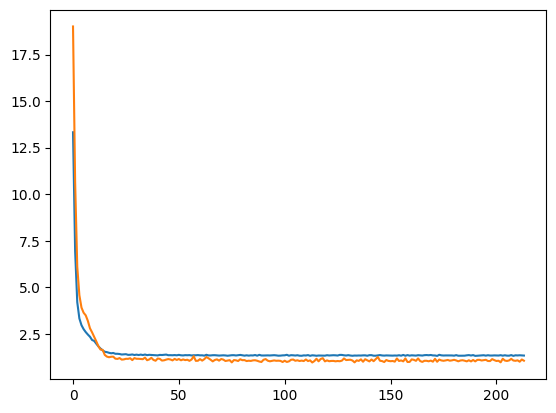

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-4.7245)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(1.8560)


In [21]:
print(vi.h_min_tilde)

-5.5076866


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.07109915304946188
tensor([0.5385])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

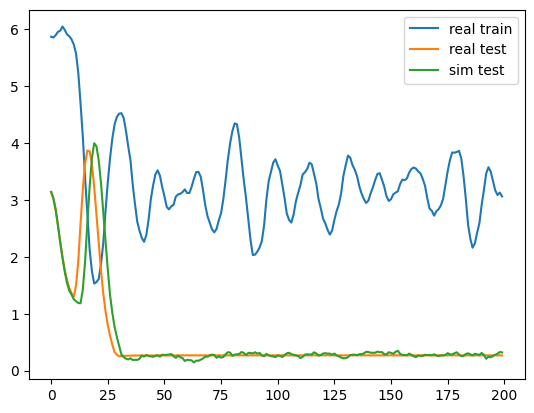

encoder [-4.6324186 -8.       ]
initial_belief tensor([-4.3978, -0.3267])
real train tensor([-4.6557, -7.9970])
real test tensor([-1.5156, -5.4661])
sim tensor([-4.6446, -7.9978])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.673469387755102


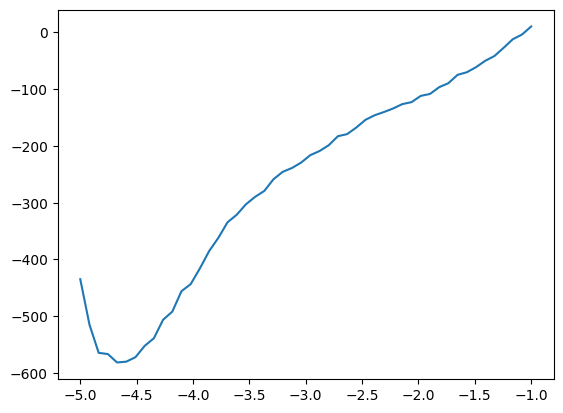

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.5094619456344531
tensor([-1.2660])
